<a href="https://colab.research.google.com/github/musstafa08-bug/Poem-Generator/blob/master/Poem_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Load Packages
import tensorflow as tf
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Activation, LSTM, Bidirectional, Embedding
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import random

In [7]:
data = open('/content/irish-lyrics-eof.txt').read()
corpus = data.lower().split('\n')
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
words = tokenizer.word_index
total_words = len(words) + 1
print(words)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [8]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [9]:
#padding
max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_length, padding = 'pre'))

In [12]:
# labels and predictors
Xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
Ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [13]:
print(words['in'])
print(words['the'])
print(words['town'])
print(words['of'])
print(words['athy'])
print(words['one'])
print(words['jeremy'])
print(words['lanigan'])

8
1
71
6
713
39
1790
1791


In [17]:
print(Xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [18]:
print(Ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [23]:
model = Sequential()
model.add(Embedding(total_words, 120, input_length = max_sequence_length-1))
model.add(Bidirectional(LSTM(180)))
model.add(Dense(total_words, activation = 'softmax'))
adam = Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
history = model.fit(Xs, Ys, epochs = 120, verbose = 1)
print(model)

Epoch 1/120
377/377 [==============================] - 4s 11ms/step - loss: 6.7610 - accuracy: 0.0635
Epoch 2/120
377/377 [==============================] - 4s 11ms/step - loss: 6.2186 - accuracy: 0.0764
Epoch 3/120
377/377 [==============================] - 4s 11ms/step - loss: 5.9347 - accuracy: 0.0847
Epoch 4/120
377/377 [==============================] - 4s 11ms/step - loss: 5.5909 - accuracy: 0.1062
Epoch 5/120
377/377 [==============================] - 4s 11ms/step - loss: 5.1769 - accuracy: 0.1203
Epoch 6/120
377/377 [==============================] - 4s 11ms/step - loss: 4.7231 - accuracy: 0.1455
Epoch 7/120
377/377 [==============================] - 4s 11ms/step - loss: 4.2499 - accuracy: 0.1810
Epoch 8/120
377/377 [==============================] - 4s 11ms/step - loss: 3.7793 - accuracy: 0.2351
Epoch 9/120
377/377 [==============================] - 4s 11ms/step - loss: 3.3413 - accuracy: 0.3072
Epoch 10/120
377/377 [==============================] - 4s 11ms/step - loss: 2.929

In [24]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

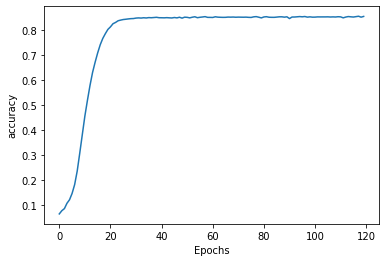

In [25]:
plot_graphs(history, 'accuracy')

In [33]:
seed_text = "Simp is getting ready for Simping"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text +=  " " '\n'  +output_word
print(seed_text)

Simp is getting ready for Simping 
the 
led 
to 
the 
wedding 
oh 
haste 
to 
the 
wedding 
i 
love 
you 
so 
pretty 
love 
so 
while 
the 
love 
he 
never 
to 
the 
best 
among 
me 
it 
took 
by 
me 
and 
immortal 
be 
my 
heart 
he 
had 
grey 
run 
from 
the 
stony 
ground 
in 
summer 
time 
their 
fathers 
notes 
came 
a 
new 
breast 
long 
still 
might 
seen 
crossroads 
your 
eyes 
has 
be 
be 
seen 
by 
day 
and 
the 
sun 
shines 
always 
there 
is 
grey 
none 
got 
each 
be 
from 
your 
rest 
he 
led 
toast 
to 
the 
fray 
he 
gave 
me 
a 
gangs 
meself 
stand 
your 
sweet 
fought 
some 
coffee
